In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import colormaps as cm
from rpy2.robjects import pandas2ri, r
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
import pbm
import geopandas as gpd
from shapely.geometry import Point
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sb
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import networkx as nx
import os




# UPLOAD WARDS DATA AND UK MAP

In [2]:
wards= pd.read_csv('generated_df/ward_codes.csv') 

In [3]:
#download the map of uk use in the census 2021
uk_shape = gpd.read_file('input_data/Wards_December_2022/WD_DEC_2022_UK_BFE.shp')

In [4]:
uk_shape = uk_shape[uk_shape['WD22CD'].str.startswith(('E'))]#only use England data
uk_shape = uk_shape.rename(columns={'WD22NM': 'ward'})
uk_shape = uk_shape.rename(columns={'WD22CD': 'wardcode'})
uk_shape = uk_shape.rename(columns={'LAD22NM': 'Local_Authority_D'})

# UPLOAD FINAL DATAFRAME

In [5]:
#df with dummies
dfWD= pd.read_csv('generated_df/dfWD.csv') 

In [6]:
#df without dummies
df= pd.read_csv('generated_df/dfwod.csv') 

In [7]:
df.set_index([df.columns[0], df.columns[1],df.columns[2]], inplace=True)


In [8]:
df

,,,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,...,Presi_L3toL4quali,PL1toL9_NS,PL10toL11_7_NS,PL12to13NS,PL14to15NS,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
wardcode,ward,Local_Authority_D,,,,,,,,,,,,,,,,,,,,,
E05013038,Burn Valley,Hartlepool,2895.6,97.1,7631,51.3,48.7,48.6,94.8,5.2,40.5,33.2,...,45.1,30.8,16.8,27.8,24.6,0,12.0,3.0,0,4.0
E05013039,De Bruce,Hartlepool,2722.9,98.4,8055,52.4,47.6,49.2,97.5,2.5,35.6,33.3,...,35.1,22.2,16.4,37.3,24.0,0,12.0,2.0,0,3.0
E05013040,Fens & Greatham,Hartlepool,331.5,98.8,6380,52.1,47.9,47.3,98.8,1.3,46.9,36.1,...,44.2,35.9,21.3,28.2,14.6,0,1.0,2.0,0,3.0
E05013041,Foggy Furze,Hartlepool,4832.0,97.2,8154,51.3,48.7,48.4,96.2,3.8,39.1,34.5,...,38.2,26.8,17.6,34.7,20.8,0,2.0,2.0,0,3.0
E05013042,Hart,Hartlepool,676.0,98.9,7644,51.8,48.2,34.1,98.2,1.8,55.7,30.6,...,54.7,43.2,20.2,23.6,13.0,0,0.0,1.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E05014383,Taunton North,Somerset West and Taunton,3095.5,96.7,10497,50.9,49.1,36.0,95.1,4.8,46.1,34.1,...,43.3,36.3,20.0,32.9,10.7,0,2.0,2.0,0,3.0
E05014384,Taunton South,Somerset West and Taunton,3187.8,95.4,11284,52.0,48.0,38.9,94.7,5.2,50.8,32.5,...,47.4,40.7,19.5,28.1,11.8,0,3.0,2.0,0,3.0
E05014385,Upper Tone,Somerset West and Taunton,64.5,96.8,9413,51.1,48.9,43.7,98.2,1.9,54.9,33.9,...,55.4,58.4,15.0,17.2,9.4,0,1.0,1.0,0,6.0


# Kmeans

In [9]:
dfkmeans21 = df.copy()

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfkmeans21)


In [11]:
X_scaled_df = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)

FIGURE 11.B

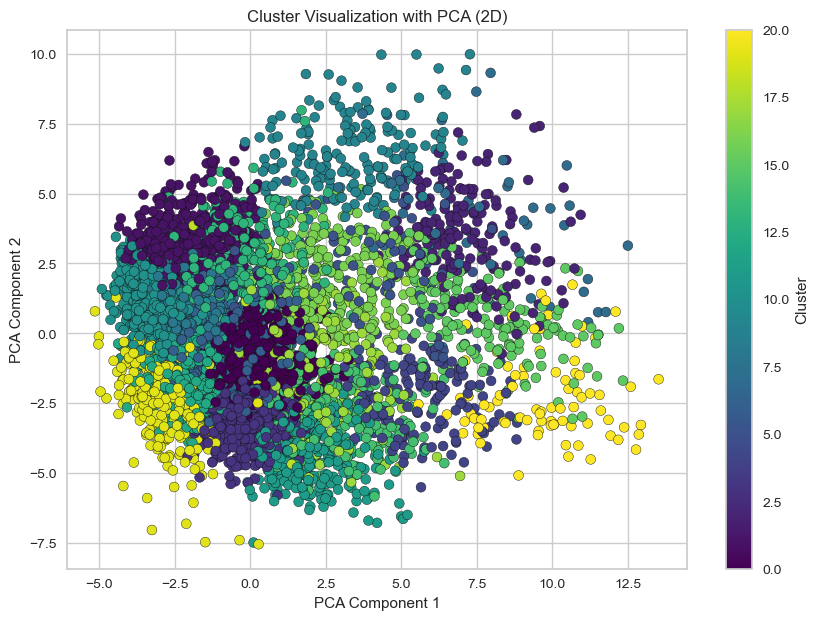

In [12]:
best_k = 21

kmeans = KMeans(n_clusters=best_k, random_state=42)
dfkmeans21['cluster21'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dfkmeans21['cluster21'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Cluster Visualization with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig('generated_df/Kmeansclusters_figures/pca_plot21clusters.png', dpi=300)
plt.show()

In [13]:
dfkmeans21.to_csv('generated_df/kmenascluster_tables/dfkmeans21clusters.csv', index=True)

In [14]:
dfkmeans21= pd.read_csv('generated_df/kmenascluster_tables/dfkmeans21clusters.csv')

In [15]:
dfWD['cluster21'] = dfkmeans21['cluster21']


In [16]:
dfWD

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,...,PriS_unique_name_count,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,cluster21
0,E05013038,Burn Valley,Hartlepool,2895.6,97.1,7631,51.3,48.7,48.6,94.8,...,4.0,0,0,0,0,0,1,0,1,14
1,E05013039,De Bruce,Hartlepool,2722.9,98.4,8055,52.4,47.6,49.2,97.5,...,3.0,0,0,0,0,0,1,0,1,11
2,E05013040,Fens & Greatham,Hartlepool,331.5,98.8,6380,52.1,47.9,47.3,98.8,...,3.0,0,0,0,0,0,1,0,1,19
3,E05013041,Foggy Furze,Hartlepool,4832.0,97.2,8154,51.3,48.7,48.4,96.2,...,3.0,0,0,0,0,0,1,0,1,3
4,E05013042,Hart,Hartlepool,676.0,98.9,7644,51.8,48.2,34.1,98.2,...,2.0,0,0,1,0,1,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,Somerset West and Taunton,3095.5,96.7,10497,50.9,49.1,36.0,95.1,...,3.0,0,0,0,0,0,1,0,1,0
6872,E05014384,Taunton South,Somerset West and Taunton,3187.8,95.4,11284,52.0,48.0,38.9,94.7,...,3.0,0,0,0,0,1,1,0,1,0
6873,E05014385,Upper Tone,Somerset West and Taunton,64.5,96.8,9413,51.1,48.9,43.7,98.2,...,6.0,0,1,1,0,1,1,0,1,10
6874,E05014386,Watchet & Stogursey,Somerset West and Taunton,112.4,97.7,9636,51.8,48.2,50.4,98.4,...,3.0,0,1,0,0,0,1,0,1,19


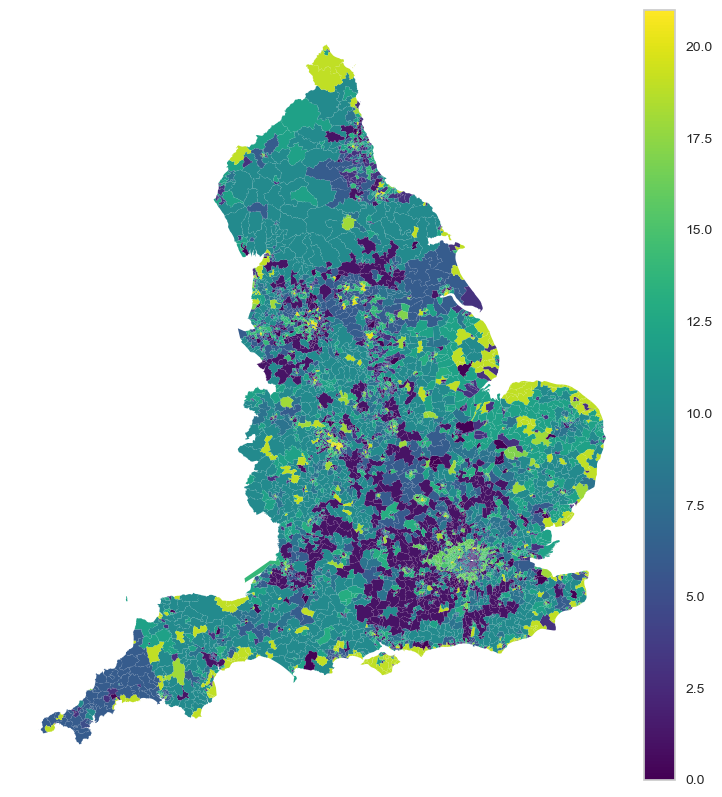

In [17]:
merge_u = uk_shape.merge(dfkmeans21, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_u.plot(column="cluster21", ax=ax, legend=True, cax=cax, cmap='viridis', vmin=0, vmax=21)
plt.show()

FIGURE 16 ERP (Appendix)

Original Bounds: minx=332390.20210000034, maxx=390350.2030999996, miny=379748.4975000005, maxy=405357.59699999914
Expanded and Adjusted Bounds: minx=303410.2016000007, maxx=419330.2035999992, miny=341334.8482500026, maxy=443771.24624999706


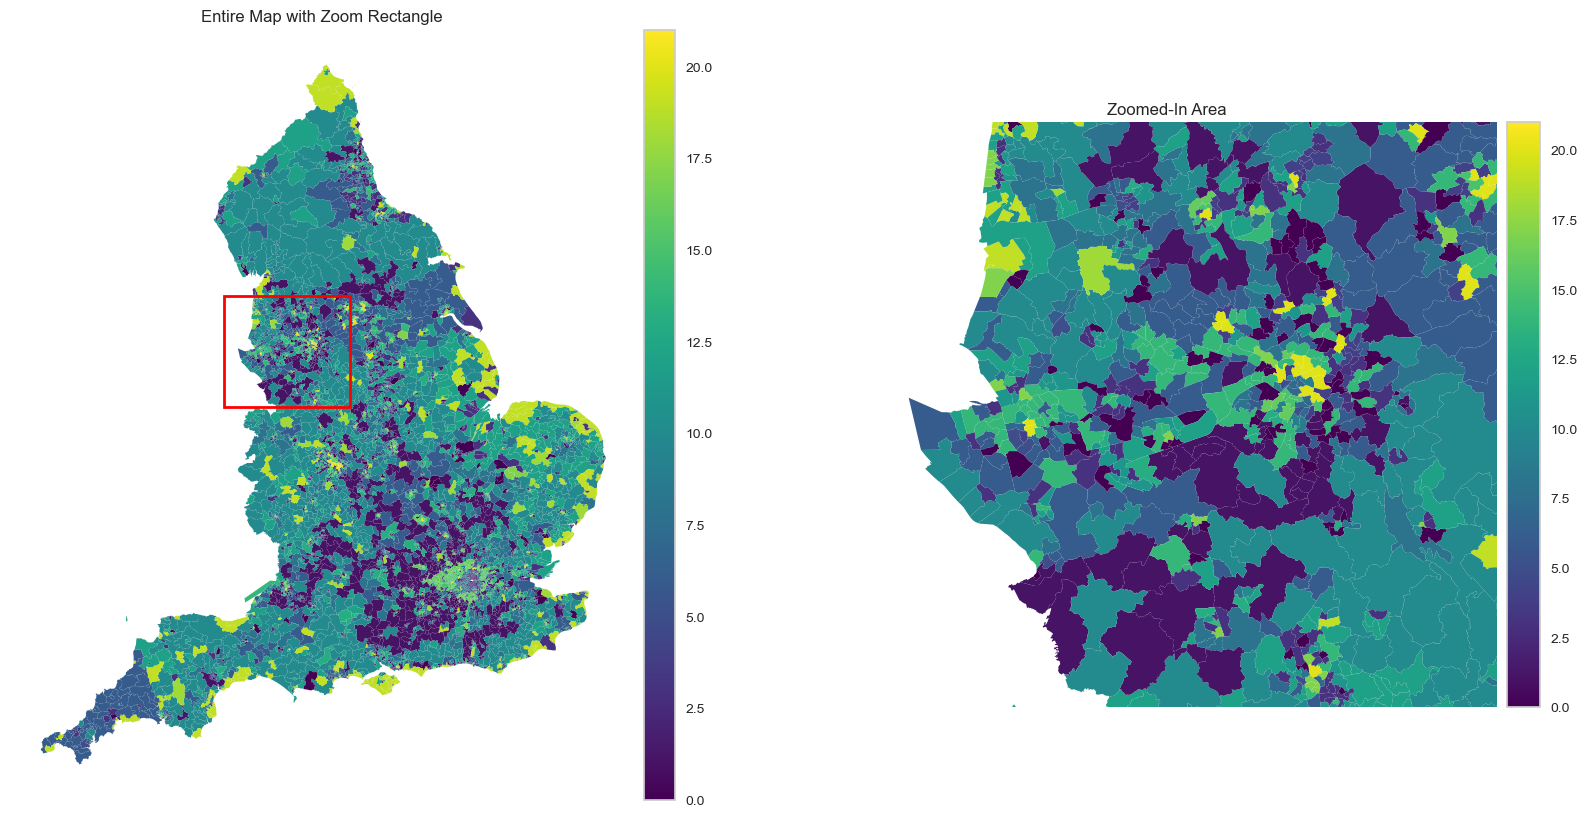

In [18]:

wards_of_interest = [
     'Liverpool', 'Manchester'
]

filtered_merge_u = merge_u[merge_u['Local_Authority_D_x'].isin(wards_of_interest)]  # Replace 'wardname' with the correct column name if different


if filtered_merge_u.empty:
    print("No data found for the specified wards.")
else:
    minx, miny, maxx, maxy = filtered_merge_u.total_bounds

    print(f"Original Bounds: minx={minx}, maxx={maxx}, miny={miny}, maxy={maxy}")

    width = maxx - minx
    height = maxy - miny

    expanded_width = width * 2
    expanded_height = height * 4

    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2

    new_minx = center_x - expanded_width / 2
    new_maxx = center_x + expanded_width / 2
    new_miny = (center_y - expanded_height / 2) #+ north_offset  # Apply northward offset
    new_maxy = (center_y + expanded_height / 2) #+ north_offset  # Apply northward offset

    print(f"Expanded and Adjusted Bounds: minx={new_minx}, maxx={new_maxx}, miny={new_miny}, maxy={new_maxy}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    ax1.set_title("Entire Map with Zoom Rectangle")
    ax1.set_axis_off()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.1)
    merge_u.plot(column="cluster21", ax=ax1, legend=True, cax=cax1, cmap='viridis', vmin=0, vmax=21)

    rect = patches.Rectangle((new_minx, new_miny), expanded_width, expanded_height, linewidth=2, edgecolor='red', facecolor='none')
    ax1.add_patch(rect)

    ax2.set_title("Zoomed-In Area")
    ax2.set_axis_off()
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.1)
    merge_u.plot(column="cluster21", ax=ax2, legend=True, cax=cax2, cmap='viridis', vmin=0, vmax=21)

    ax2.set_xlim(new_minx, new_maxx)
    ax2.set_ylim(new_miny, new_maxy)
    
    plt.savefig('generated_df/Kmeansclusters_figures/K_means_21clusters_Map.png', dpi=300)

    
    

    plt.show()

# mean not standarized

In [19]:
columns = [
    'pop_density_sqrkilometer','Pborn_Europe', 'total_population', 'Ptotal_populationF', 'Ptotal_populationM', 
    'PEconomicallyInactive', 'Pwhite', 'Pother_ethnic', 'Phousehold_notdeprived', 
    'Phousehold_deprived1D', 'PhouseOwned', 'PhouseSocialRented', 'PhousePrivateRented', 
    'P0to15_age', 'P16to49_age', 'P50over_age', 'Pborn_outsideEurope', 'Pinemployment', 
    'Punemployment', 'Phousehold_D2ormore', 'Presi_0toL1quali', 'Presi_L2toApprequali', 
    'Presi_L3toL4quali', 'PL1toL9_NS', 'PL10toL11_7_NS', 'PL12to13NS', 'PL14to15NS', 
    'air_score_ward', 'GP_unique_name_count', 'PH_unique_name_count', 'Uni_score_ward', 
    'PriS_unique_name_count','small_communities', 'rural_communites', 'majorityL3L4q', 
                'majorityP16to49_age', 'dnone50', 'GP_above1', 
                'VeryGoodhealth', 'PH_above1'
]

means = {}

for col in columns:
    means[col] = dfWD.groupby('cluster21')[col].mean()

kmeans_means_df12 = pd.DataFrame(means)
kmeans_means_df12
size = dfWD['cluster21'].value_counts()

kmeans_means_df12['size'] = size

csv_file_path = 'generated_df/kmenascluster_tables/kmeans21_meannotstandarize.csv'
kmeans_means_df12.to_csv(csv_file_path, index=True)

kmeans_means_df12_transposed1 = kmeans_means_df12.T
kmeans_means_df12_transposed1

cluster21,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
pop_density_sqrkilometer,3037.350654,1038.691474,12883.179558,2316.955273,5262.225625,4468.698969,1540.300634,6012.616071,1319.391615,7811.009890,...,3408.120000,1388.614572,2368.922742,3364.951786,8253.834615,4647.590943,4255.621264,213.193939,1029.733226,6131.902381
Pborn_Europe,94.218131,93.282416,73.329282,97.311636,79.966875,87.176289,95.811205,80.905357,95.866770,79.529670,...,95.769655,97.344251,91.454849,92.557500,63.355769,81.151321,90.358621,94.900000,97.280645,70.811905
total_population,8499.370093,6716.618117,13004.243094,7024.149091,13363.987500,11347.463918,11596.120507,12955.839286,5816.928571,11174.219780,...,8130.144828,5635.132353,8064.250836,14360.185714,14694.807692,11927.098113,8695.304598,5031.000000,4979.987097,17409.500000
Ptotal_populationF,51.059065,51.182060,51.692818,51.227818,50.963750,50.704124,51.350951,49.776786,50.945031,51.525824,...,51.590690,51.237299,50.605017,51.113929,50.124359,51.206038,48.903448,40.521212,52.213871,49.895238
Ptotal_populationM,48.940935,48.817940,48.307182,48.772182,49.036250,49.294845,48.649049,50.223214,49.054969,48.474176,...,48.409310,48.762701,49.394983,48.886071,49.875641,48.793962,51.096552,59.478788,47.786129,50.104762
PEconomicallyInactive,35.230467,38.338899,31.562431,42.082182,40.816875,43.847423,40.511628,56.575000,36.370186,30.385714,...,42.578966,42.280481,28.450167,40.133929,37.269872,34.553585,37.105172,44.860606,52.131290,46.347619
Pwhite,89.130467,90.859325,51.300000,95.163091,52.655000,79.203093,92.652854,70.096429,93.597050,72.073077,...,91.521034,96.037032,86.045485,83.850357,29.648077,62.185660,84.040805,91.357576,97.137419,34.744048
Pother_ethnic,10.864112,9.133925,48.708840,4.829818,47.343125,20.795876,7.348626,29.892857,6.399224,27.925824,...,8.479655,3.961631,13.957860,16.144286,70.348718,37.804151,15.955172,8.624242,2.851935,65.258333
Phousehold_notdeprived,48.115140,61.145293,46.031492,41.718909,36.240000,49.602062,51.492600,51.512500,55.568634,59.425824,...,35.680690,48.316176,59.395652,40.303929,38.642308,50.682642,42.663793,54.372727,45.134194,32.315476
Phousehold_deprived1D,33.730093,29.449201,32.522099,35.424364,36.074375,33.063918,33.335941,32.692857,32.148137,28.515934,...,35.284828,35.256952,29.487960,34.607500,37.110256,32.905660,34.874138,32.984848,37.413548,36.348810


In [20]:
columns = [
    'pop_density_sqrkilometer','Pborn_Europe', 'total_population', 'Ptotal_populationF', 'Ptotal_populationM', 
    'PEconomicallyInactive', 'Pwhite', 'Pother_ethnic', 'Phousehold_notdeprived', 
    'Phousehold_deprived1D', 'PhouseOwned', 'PhouseSocialRented', 'PhousePrivateRented', 
    'P0to15_age', 'P16to49_age', 'P50over_age', 'Pborn_outsideEurope', 'Pinemployment', 
    'Punemployment', 'Phousehold_D2ormore', 'Presi_0toL1quali', 'Presi_L2toApprequali', 
    'Presi_L3toL4quali', 'PL1toL9_NS', 'PL10toL11_7_NS', 'PL12to13NS', 'PL14to15NS', 
    'air_score_ward', 'GP_unique_name_count', 'PH_unique_name_count', 'Uni_score_ward', 
    'PriS_unique_name_count'
]

means = {}

for col in columns:
    means[col] = dfkmeans21.groupby('cluster21')[col].mean()

k_meansmean_df = pd.DataFrame(means)
k_meansmean_df
k_meansmean_df_transposed = k_meansmean_df.T
k_meansmean_df_transposed

cluster21,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
pop_density_sqrkilometer,3037.350654,1038.691474,12883.179558,2316.955273,5262.225625,4468.698969,1540.300634,6012.616071,1319.391615,7811.009890,...,3408.120000,1388.614572,2368.922742,3364.951786,8253.834615,4647.590943,4255.621264,213.193939,1029.733226,6131.902381
Pborn_Europe,94.218131,93.282416,73.329282,97.311636,79.966875,87.176289,95.811205,80.905357,95.866770,79.529670,...,95.769655,97.344251,91.454849,92.557500,63.355769,81.151321,90.358621,94.900000,97.280645,70.811905
total_population,8499.370093,6716.618117,13004.243094,7024.149091,13363.987500,11347.463918,11596.120507,12955.839286,5816.928571,11174.219780,...,8130.144828,5635.132353,8064.250836,14360.185714,14694.807692,11927.098113,8695.304598,5031.000000,4979.987097,17409.500000
Ptotal_populationF,51.059065,51.182060,51.692818,51.227818,50.963750,50.704124,51.350951,49.776786,50.945031,51.525824,...,51.590690,51.237299,50.605017,51.113929,50.124359,51.206038,48.903448,40.521212,52.213871,49.895238
Ptotal_populationM,48.940935,48.817940,48.307182,48.772182,49.036250,49.294845,48.649049,50.223214,49.054969,48.474176,...,48.409310,48.762701,49.394983,48.886071,49.875641,48.793962,51.096552,59.478788,47.786129,50.104762
PEconomicallyInactive,35.230467,38.338899,31.562431,42.082182,40.816875,43.847423,40.511628,56.575000,36.370186,30.385714,...,42.578966,42.280481,28.450167,40.133929,37.269872,34.553585,37.105172,44.860606,52.131290,46.347619
Pwhite,89.130467,90.859325,51.300000,95.163091,52.655000,79.203093,92.652854,70.096429,93.597050,72.073077,...,91.521034,96.037032,86.045485,83.850357,29.648077,62.185660,84.040805,91.357576,97.137419,34.744048
Pother_ethnic,10.864112,9.133925,48.708840,4.829818,47.343125,20.795876,7.348626,29.892857,6.399224,27.925824,...,8.479655,3.961631,13.957860,16.144286,70.348718,37.804151,15.955172,8.624242,2.851935,65.258333
Phousehold_notdeprived,48.115140,61.145293,46.031492,41.718909,36.240000,49.602062,51.492600,51.512500,55.568634,59.425824,...,35.680690,48.316176,59.395652,40.303929,38.642308,50.682642,42.663793,54.372727,45.134194,32.315476
Phousehold_deprived1D,33.730093,29.449201,32.522099,35.424364,36.074375,33.063918,33.335941,32.692857,32.148137,28.515934,...,35.284828,35.256952,29.487960,34.607500,37.110256,32.905660,34.874138,32.984848,37.413548,36.348810


In [21]:
csv_file_path = 'generated_df/k_means16mean_df.csv'
k_meansmean_df_transposed.to_csv(csv_file_path, index=True)

# Standard deviation not stanzarized

In [22]:
columns = [
    'pop_density_sqrkilometer','Pborn_Europe', 'total_population', 'Ptotal_populationF', 'Ptotal_populationM', 
    'PEconomicallyInactive', 'Pwhite', 'Pother_ethnic', 'Phousehold_notdeprived', 
    'Phousehold_deprived1D', 'PhouseOwned', 'PhouseSocialRented', 'PhousePrivateRented', 
    'P0to15_age', 'P16to49_age', 'P50over_age', 'Pborn_outsideEurope', 'Pinemployment', 
    'Punemployment', 'Phousehold_D2ormore', 'Presi_0toL1quali', 'Presi_L2toApprequali', 
    'Presi_L3toL4quali', 'PL1toL9_NS', 'PL10toL11_7_NS', 'PL12to13NS', 'PL14to15NS', 
    'air_score_ward', 'GP_unique_name_count', 'PH_unique_name_count', 'Uni_score_ward', 
    'PriS_unique_name_count'
]

std = {}

for col in columns:
    std[col] = dfkmeans21.groupby('cluster21')[col].std()

k_meansstd_df = pd.DataFrame(std)
k_meansstd_df_transposed = k_meansstd_df.T
k_meansstd_df_transposed

cluster21,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
pop_density_sqrkilometer,1627.450616,1262.504975,3160.207082,1639.332330,2206.014912,2821.654745,1434.973570,3054.341619,1314.940556,3747.382836,...,1511.139036,1387.338604,1754.120709,1543.590388,3408.745394,2175.514166,2306.538066,321.400819,1074.449849,3037.215144
Pborn_Europe,3.506931,3.472981,4.937968,1.802682,4.762454,5.679931,2.902450,7.162641,2.430313,7.233188,...,3.087822,1.643121,4.200759,4.347909,8.368437,5.879800,5.897331,3.314174,1.352768,8.204090
total_population,3142.479798,3271.759734,3480.791129,3013.975401,4248.225777,4908.464112,3985.857681,5654.252491,2536.307305,3239.980562,...,3359.582764,2447.523316,3314.485838,3744.116618,3467.681122,3631.454156,3788.164262,2302.934419,2384.524112,3938.045431
Ptotal_populationF,0.734558,0.995782,1.381587,0.785414,1.269204,2.330992,0.808013,2.801752,0.878226,1.805897,...,0.942618,0.837563,1.165561,0.994493,1.215670,0.977106,1.326428,3.696261,1.080379,1.554078
Ptotal_populationM,0.734558,0.995782,1.381587,0.785414,1.269204,2.331012,0.808013,2.801752,0.878226,1.805897,...,0.942618,0.837563,1.165561,0.994493,1.215670,0.977106,1.326428,3.696261,1.080379,1.554078
PEconomicallyInactive,3.040209,3.235402,4.657899,3.468417,4.929123,6.191646,3.763548,10.305749,2.793891,6.100305,...,4.363850,2.934436,3.864677,3.462833,4.451175,3.896210,5.358255,9.756534,4.363643,5.296361
Pwhite,7.307145,6.596591,8.761976,3.695412,12.096685,11.139798,6.309516,11.985127,4.612139,10.079063,...,6.502515,3.271074,7.892555,10.441745,11.591212,11.767254,9.817055,3.633613,1.609846,18.984638
Pother_ethnic,7.310391,6.598420,8.761553,3.698173,12.089559,11.146664,6.313666,11.996194,4.611762,10.085006,...,6.503364,3.272842,7.900456,10.437455,11.592926,11.771284,9.823009,3.622157,1.613910,18.980238
Phousehold_notdeprived,2.830263,2.960648,5.432163,2.890794,3.850446,6.100256,3.956095,9.221537,2.690438,4.528796,...,3.332960,2.879823,3.860080,3.818539,5.419130,4.014651,5.692974,6.555783,5.011320,5.483194
Phousehold_deprived1D,1.349286,1.579060,2.105432,1.710715,1.471287,2.121329,1.712200,3.553275,1.487097,2.203768,...,1.595987,1.627933,2.026996,1.316907,1.790267,1.714070,2.279760,2.379748,1.831284,1.798225


In [23]:
csv_file_path = 'generated_df/k_means21corr_df.csv'
k_meansstd_df_transposed.to_csv(csv_file_path, index=True)

# join clusters 

In [24]:
df_clusters= X_scaled_df.reset_index()

In [25]:
df_clusters[['small_communities', 'rural_communites','majorityL3L4q','majorityP16to49_age','dnone50','GP_above1','VeryGoodhealth','PH_above1']] = dfWD[['small_communities', 'rural_communites','majorityL3L4q','majorityP16to49_age','dnone50','GP_above1','VeryGoodhealth','PH_above1']]


In [26]:
df_clusters['cluster21'] = dfkmeans21['cluster21']
df_clusters

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,...,PriS_unique_name_count,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,cluster21
0,E05013038,Burn Valley,Hartlepool,0.068075,0.563326,-0.123780,0.165709,-0.165699,1.373991,0.491627,...,1.040543,0,0,0,0,0,1,0,1,14
1,E05013039,De Bruce,Hartlepool,0.011814,0.714817,-0.030062,0.942356,-0.942347,1.466255,0.649784,...,0.458097,0,0,0,0,0,1,0,1,11
2,E05013040,Fens & Greatham,Hartlepool,-0.767240,0.761429,-0.400292,0.730543,-0.730534,1.174087,0.725933,...,0.458097,0,0,0,0,0,1,0,1,19
3,E05013041,Foggy Furze,Hartlepool,0.698903,0.574979,-0.008180,0.165709,-0.165699,1.343237,0.573634,...,0.458097,0,0,0,0,0,1,0,1,3
4,E05013042,Hart,Hartlepool,-0.655011,0.773083,-0.120907,0.518730,-0.518721,-0.855709,0.690787,...,-0.124350,0,0,1,0,1,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,Somerset West and Taunton,0.133198,0.516713,0.509699,-0.116709,0.116719,-0.563542,0.509200,...,0.458097,0,0,0,0,0,1,0,1,0
6872,E05014384,Taunton South,Somerset West and Taunton,0.163266,0.365222,0.683652,0.659938,-0.659930,-0.117601,0.485769,...,0.458097,0,0,0,0,1,1,0,1,0
6873,E05014385,Upper Tone,Somerset West and Taunton,-0.854222,0.528366,0.270100,0.024500,-0.024490,0.620506,0.690787,...,2.205437,0,1,1,0,1,1,0,1,10
6874,E05014386,Watchet & Stogursey,Somerset West and Taunton,-0.838617,0.633245,0.319390,0.518730,-0.518721,1.650782,0.702502,...,0.458097,0,1,0,0,0,1,0,1,19


# MEAN STANDARIZED

In [27]:
columns = [
    'pop_density_sqrkilometer','Pborn_Europe', 'total_population', 'Ptotal_populationF', 'Ptotal_populationM', 
    'PEconomicallyInactive', 'Pwhite', 'Pother_ethnic', 'Phousehold_notdeprived', 
    'Phousehold_deprived1D', 'PhouseOwned', 'PhouseSocialRented', 'PhousePrivateRented', 
    'P0to15_age', 'P16to49_age', 'P50over_age', 'Pborn_outsideEurope', 'Pinemployment', 
    'Punemployment', 'Phousehold_D2ormore', 'Presi_0toL1quali', 'Presi_L2toApprequali', 
    'Presi_L3toL4quali', 'PL1toL9_NS', 'PL10toL11_7_NS', 'PL12to13NS', 'PL14to15NS', 
    'air_score_ward', 'GP_unique_name_count', 'PH_unique_name_count', 'Uni_score_ward', 
    'PriS_unique_name_count','small_communities', 'rural_communites', 'majorityL3L4q', 
                'majorityP16to49_age', 'dnone50', 'GP_above1', 
                'VeryGoodhealth', 'PH_above1'
]

means = {}

for col in columns:
    means[col] = df_clusters.groupby('cluster21')[col].mean()

kmeans_means_dfstd = pd.DataFrame(means)
kmeans_means_dfstd
size = df_clusters['cluster21'].value_counts()

kmeans_means_dfstd['size'] = size

kmeans_means_dfstdtransposed = kmeans_means_dfstd.T
kmeans_means_dfstdtransposed

cluster21,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
pop_density_sqrkilometer,0.114254,-0.536856,3.321763,-0.120432,0.839059,0.580549,-0.373445,1.083516,-0.445411,1.669385,...,0.235041,-0.422860,-0.103502,0.220978,1.813646,0.638828,0.511134,-0.805781,-0.539774,1.122377
Pborn_Europe,0.227497,0.118457,-2.206713,0.587988,-1.433224,-0.593100,0.413140,-1.323861,0.419616,-1.484172,...,0.408299,0.591789,-0.094513,0.033981,-3.368942,-1.295199,-0.222258,0.306956,0.584377,-2.500067
total_population,0.068158,-0.325888,1.063881,-0.257914,1.143397,0.697679,0.752641,1.053183,-0.524749,0.659387,...,-0.013453,-0.564932,-0.028017,1.363589,1.437551,0.825797,0.111466,-0.698464,-0.709740,2.037586
Ptotal_populationF,-0.004402,0.082438,0.443055,0.114745,-0.071698,-0.255006,0.201682,-0.909746,-0.084915,0.325150,...,0.370948,0.121439,-0.324979,0.034334,-0.664344,0.099367,-1.526359,-7.444577,0.810940,-0.826113
Ptotal_populationM,0.004412,-0.082428,-0.443045,-0.114735,0.071709,0.254289,-0.201673,0.909758,0.084925,-0.325141,...,-0.370938,-0.121429,0.324990,-0.034324,0.664356,-0.099357,1.526373,7.444604,-0.810932,0.826126
PEconomicallyInactive,-0.681875,-0.203883,-1.245918,0.371730,0.177161,0.643176,0.130222,2.600327,-0.506617,-1.426864,...,0.448122,0.402223,-1.724498,0.072143,-0.368270,-0.785960,-0.393597,0.798976,1.917007,1.027637
Pwhite,0.159526,0.260796,-2.056451,0.512896,-1.977080,-0.421985,0.365855,-0.955422,0.421162,-0.839637,...,0.299557,0.564088,-0.021182,-0.149765,-3.324745,-1.418807,-0.138609,0.289982,0.628545,-3.026241
Pother_ethnic,-0.159615,-0.260954,2.056990,-0.513050,1.976999,0.422099,-0.365521,0.954918,-0.421128,0.839707,...,-0.299275,-0.563901,0.021589,0.149650,3.324460,1.418291,0.138574,-0.290807,-0.628897,3.026311
Phousehold_notdeprived,-0.174003,1.393193,-0.424613,-0.943307,-1.602280,0.004836,0.232220,0.234613,0.722463,1.186385,...,-1.669551,-0.149823,1.182756,-1.113493,-1.313343,0.134802,-0.829661,0.578626,-0.532535,-2.074300
Phousehold_deprived1D,0.091000,-1.422071,-0.335962,0.689836,0.919580,-0.144458,-0.048312,-0.275609,-0.468139,-1.751932,...,0.640517,0.630664,-1.408371,0.401117,1.285710,-0.200394,0.495360,-0.172405,1.392908,1.016579


# Standard deviation standarized

In [28]:
columns = [
    'pop_density_sqrkilometer','Pborn_Europe', 'total_population', 'Ptotal_populationF', 'Ptotal_populationM', 
    'PEconomicallyInactive', 'Pwhite', 'Pother_ethnic', 'Phousehold_notdeprived', 
    'Phousehold_deprived1D', 'PhouseOwned', 'PhouseSocialRented', 'PhousePrivateRented', 
    'P0to15_age', 'P16to49_age', 'P50over_age', 'Pborn_outsideEurope', 'Pinemployment', 
    'Punemployment', 'Phousehold_D2ormore', 'Presi_0toL1quali', 'Presi_L2toApprequali', 
    'Presi_L3toL4quali', 'PL1toL9_NS', 'PL10toL11_7_NS', 'PL12to13NS', 'PL14to15NS', 
    'air_score_ward', 'GP_unique_name_count', 'PH_unique_name_count', 'Uni_score_ward', 
    'PriS_unique_name_count','small_communities', 'rural_communites', 'majorityL3L4q', 
                'majorityP16to49_age', 'dnone50', 'GP_above1', 
                'VeryGoodhealth', 'PH_above1'
]

std = {}

for col in columns:
    std[col] = df_clusters.groupby('cluster21')[col].std()

k_meansstd_dfstd = pd.DataFrame(std)
k_meansstd_dfstdtransposed = k_meansstd_dfstd.T
k_meansstd_dfstdtransposed

cluster21,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
pop_density_sqrkilometer,0.530180,0.411291,1.029511,0.534051,0.718661,0.919220,0.467476,0.995023,0.428373,1.220798,...,0.492289,0.451958,0.571446,0.502861,1.110479,0.708725,0.751409,0.104704,0.350027,0.989444
Pborn_Europe,0.408668,0.404712,0.575429,0.210069,0.554976,0.661891,0.338227,0.834674,0.283208,0.842895,...,0.359829,0.191475,0.489521,0.506669,0.975187,0.685182,0.687225,0.386206,0.157640,0.956035
total_population,0.694590,0.723165,0.769368,0.666187,0.938996,1.084930,0.881004,1.249774,0.560606,0.716141,...,0.742577,0.540982,0.732609,0.827571,0.766470,0.802669,0.837307,0.509023,0.527057,0.870436
Ptotal_populationF,0.518630,0.703065,0.975459,0.554536,0.896112,1.645780,0.570492,1.978157,0.620065,1.275040,...,0.665529,0.591355,0.822936,0.702155,0.858315,0.689879,0.936515,2.609719,0.762794,1.097245
Ptotal_populationM,0.518631,0.703066,0.975461,0.554537,0.896114,1.645798,0.570493,1.978161,0.620067,1.275043,...,0.665530,0.591357,0.822938,0.702156,0.858317,0.689880,0.936517,2.609725,0.762795,1.097248
PEconomicallyInactive,0.467500,0.497516,0.716257,0.533347,0.757963,0.952105,0.578730,1.584740,0.429624,0.938059,...,0.671040,0.451235,0.594281,0.532488,0.684468,0.599130,0.823952,1.500286,0.671008,0.814434
Pwhite,0.428027,0.386405,0.513246,0.216464,0.708582,0.652530,0.369589,0.702047,0.270163,0.590396,...,0.380895,0.191608,0.462318,0.611641,0.678973,0.689285,0.575049,0.212844,0.094299,1.112054
Pother_ethnic,0.428177,0.386476,0.513173,0.216606,0.708098,0.652872,0.369798,0.702630,0.270116,0.590689,...,0.380909,0.191694,0.462738,0.611333,0.679010,0.689456,0.575344,0.212153,0.094528,1.111692
Phousehold_notdeprived,0.340409,0.356091,0.653351,0.347689,0.463111,0.733706,0.475818,1.109116,0.323591,0.544699,...,0.400870,0.346369,0.464269,0.459273,0.651783,0.482860,0.684720,0.788494,0.602734,0.659489
Phousehold_deprived1D,0.476902,0.558115,0.744160,0.604648,0.520023,0.749779,0.605173,1.255896,0.525611,0.778916,...,0.564098,0.575389,0.716437,0.465458,0.632765,0.605834,0.805775,0.841116,0.647263,0.635578


In [29]:
df_excluding_last = k_meansstd_dfstdtransposed.iloc[:-1]

last_8_rows = df_excluding_last.iloc[-8:]

column_means_last_8 = last_8_rows.mean()


new_row = pd.DataFrame([column_means_last_8], index=['average_of_dummy_variables'])

k_meansstd_dfstdtransposed = pd.concat([k_meansstd_dfstdtransposed, new_row])

k_meansstd_dfstd= k_meansstd_dfstdtransposed.T

In [30]:
k_meansstd_dfstd

,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,...,PriS_unique_name_count,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,average_of_dummy_variables
cluster21,,,,,,,,,,,,,,,,,,,,,
0,0.530180,0.408668,0.694590,0.518630,0.518631,0.467500,0.428027,0.428177,0.340409,0.476902,...,0.829976,0.291346,0.154120,0.339579,0.128726,0.439962,0.500446,0.301524,0.463804,0.373210
1,0.411291,0.404712,0.723165,0.703065,0.703066,0.497516,0.386405,0.386476,0.356091,0.558115,...,0.951621,0.464684,0.498844,0.000000,0.000000,0.000000,0.500425,0.150325,0.499584,0.320737
2,1.029511,0.575429,0.769368,0.975459,0.975461,0.716257,0.513246,0.513173,0.653351,0.744160,...,0.886090,0.000000,0.000000,0.000000,0.164349,0.426774,0.419740,0.229099,0.391672,0.265756
3,0.534051,0.210069,0.666187,0.554536,0.554537,0.533347,0.216464,0.216606,0.347689,0.604648,...,0.800594,0.426359,0.277094,0.060247,0.000000,0.000000,0.498702,0.000000,0.458675,0.257874
4,0.718661,0.554976,0.938996,0.896112,0.896114,0.757963,0.708582,0.708098,0.463111,0.520023,...,1.159242,0.079057,0.000000,0.218629,0.386435,0.000000,0.474342,0.351938,0.444702,0.333705
5,0.919220,0.661891,1.084930,1.645780,1.645798,0.952105,0.652530,0.652872,0.733706,0.749779,...,0.973468,0.174022,0.174022,0.000000,0.342444,0.502357,0.479610,0.500429,0.468739,0.393294
6,0.467476,0.338227,0.881004,0.570492,0.570493,0.578730,0.369589,0.369798,0.475818,0.605173,...,1.042984,0.102378,0.449017,0.498996,0.045980,0.484430,0.355468,0.420201,0.272104,0.424932
7,0.995023,0.834674,1.249774,1.978157,1.978161,1.584740,0.702047,0.702630,1.109116,1.255896,...,0.807976,0.133631,0.000000,0.000000,0.000000,0.504203,0.488504,0.312094,0.483494,0.280801
8,0.428373,0.283208,0.560606,0.620065,0.620067,0.429624,0.270163,0.270116,0.323591,0.525611,...,0.702447,0.484699,0.464342,0.429701,0.000000,0.096147,0.484699,0.498755,0.500270,0.395099


Information used for table 1

In [31]:
k_meansstd_dfstd['average_of_dummy_variables'].describe()

count    21.000000
mean      0.344718
std       0.069121
min       0.213544
25%       0.280801
50%       0.353560
75%       0.395099
max       0.463618
Name: average_of_dummy_variables, dtype: float64

# Participation (mean)

In [32]:
result = {}

total_wards_per_cluster = dfWD.groupby('cluster21').size()

for column in ['small_communities', 'rural_communites', 'majorityL3L4q', 
                'majorityP16to49_age', 'dnone50', 'GP_above1', 
                'VeryGoodhealth', 'PH_above1']:
    
    positive_counts = dfWD.groupby('cluster21')[column].apply(lambda x: (x > 0).sum())
    
    percentages = (positive_counts / total_wards_per_cluster) * 100
    
    result[column] = percentages

result_df = pd.DataFrame(result).fillna(0)

size = dfWD['cluster21'].value_counts()

result_df['size'] = size

result_df

,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,size
cluster21,,,,,,,,,
0,9.345794,2.429907,13.271028,1.682243,26.168224,50.467290,10.093458,68.785047,535
1,31.438721,46.003552,100.000000,0.000000,100.000000,50.444050,97.690941,52.930728,563
2,0.000000,0.000000,100.000000,97.237569,23.756906,77.348066,94.475138,81.215470,181
3,23.818182,8.363636,0.363636,0.000000,0.000000,54.181818,0.000000,70.000000,550
4,0.625000,0.000000,5.000000,18.125000,0.000000,66.250000,14.375000,73.125000,160
5,3.092784,3.092784,100.000000,86.597938,48.453608,64.948454,45.360825,68.041237,97
6,1.057082,27.906977,53.911205,0.211416,62.579281,85.200846,22.832981,91.966173,473
7,1.785714,0.000000,100.000000,100.000000,51.785714,62.500000,89.285714,64.285714,56
8,37.577640,31.366460,75.621118,0.000000,99.068323,37.577640,54.037267,48.913043,644


In [33]:
result = {}

total_wards_per_cluster = df_clusters.groupby('cluster21').size()

for column in ['small_communities', 'rural_communites', 'majorityL3L4q', 
                'majorityP16to49_age', 'dnone50', 'GP_above1', 
                'VeryGoodhealth', 'PH_above1']:
    
    positive_counts = df_clusters.groupby('cluster21')[column].apply(lambda x: (x > 0).sum())
    
    percentages = (positive_counts / total_wards_per_cluster) * 100
    
    result[column] = percentages

result_df1 = pd.DataFrame(result).fillna(0)

size = df_clusters['cluster21'].value_counts()

result_df1['size'] = size

result_df1

,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,size
cluster21,,,,,,,,,
0,9.345794,2.429907,13.271028,1.682243,26.168224,50.467290,10.093458,68.785047,535
1,31.438721,46.003552,100.000000,0.000000,100.000000,50.444050,97.690941,52.930728,563
2,0.000000,0.000000,100.000000,97.237569,23.756906,77.348066,94.475138,81.215470,181
3,23.818182,8.363636,0.363636,0.000000,0.000000,54.181818,0.000000,70.000000,550
4,0.625000,0.000000,5.000000,18.125000,0.000000,66.250000,14.375000,73.125000,160
5,3.092784,3.092784,100.000000,86.597938,48.453608,64.948454,45.360825,68.041237,97
6,1.057082,27.906977,53.911205,0.211416,62.579281,85.200846,22.832981,91.966173,473
7,1.785714,0.000000,100.000000,100.000000,51.785714,62.500000,89.285714,64.285714,56
8,37.577640,31.366460,75.621118,0.000000,99.068323,37.577640,54.037267,48.913043,644


In [34]:
result_df1

,small_communities,rural_communites,majorityL3L4q,majorityP16to49_age,dnone50,GP_above1,VeryGoodhealth,PH_above1,size
cluster21,,,,,,,,,
0,9.345794,2.429907,13.271028,1.682243,26.168224,50.467290,10.093458,68.785047,535
1,31.438721,46.003552,100.000000,0.000000,100.000000,50.444050,97.690941,52.930728,563
2,0.000000,0.000000,100.000000,97.237569,23.756906,77.348066,94.475138,81.215470,181
3,23.818182,8.363636,0.363636,0.000000,0.000000,54.181818,0.000000,70.000000,550
4,0.625000,0.000000,5.000000,18.125000,0.000000,66.250000,14.375000,73.125000,160
5,3.092784,3.092784,100.000000,86.597938,48.453608,64.948454,45.360825,68.041237,97
6,1.057082,27.906977,53.911205,0.211416,62.579281,85.200846,22.832981,91.966173,473
7,1.785714,0.000000,100.000000,100.000000,51.785714,62.500000,89.285714,64.285714,56
8,37.577640,31.366460,75.621118,0.000000,99.068323,37.577640,54.037267,48.913043,644


 Figure 12B

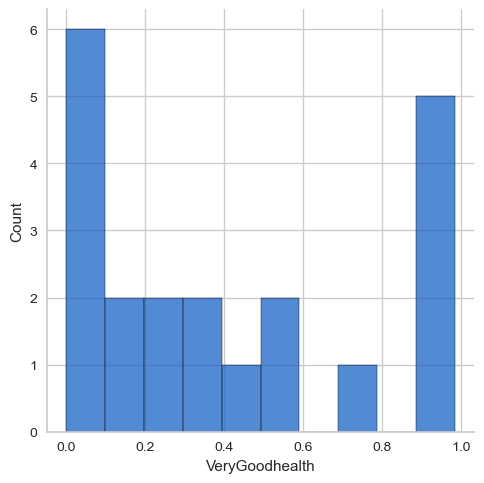

In [35]:
sns.displot(kmeans_means_df12['VeryGoodhealth'],bins=10, color='#1a63c6', edgecolor='black')

plt.savefig('generated_df/Kmeansclusters_figures/kmeansvghdist.png', dpi=300)


plt.show()